In [11]:
import pandas as pd
import numpy as np
import re

In [12]:
# reading file
df = pd.read_csv('nike_shoes_sales.csv')
df.head()

,product_name,product_id,listing_price,sale_price,discount,brand,description,rating,reviews,images
0,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
1,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
2,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
3,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
4,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."


In [13]:
# Some product don't have listing price, rating or review
# text analysis available
# images available throuhg a url / contains empty records
df.info

<bound method DataFrame.info of                              product_name  product_id  listing_price  \
0          Nike Air Force 1 '07 Essential  CJ1646-600              0   
1                    Nike Air Force 1 '07  CT4328-101              0   
2            Nike Air Force 1 Sage Low LX  CI3482-200              0   
3                     Nike Air Max Dia SE  CD0479-200              0   
4                     Nike Air Max Verona  CZ6156-101              0   
..                                    ...         ...            ...   
638                    Air Jordan 8 Retro  CI1236-100          15995   
639            Nike Phantom Venom Club IC  AO0578-717           4995   
640  Nike Mercurial Superfly 7 Academy TF  AT7978-414           8495   
641                       Nike Air Max 98  AH6799-300              0   
642                        Nike P-6000 SE  CJ9585-600           8995   

     sale_price  discount brand  \
0          7495         0  Nike   
1          7495         0  Nike  

In [14]:
# discount column looks empty
# ratings are categories from 0 - 5 
# reviews is a count of the review of each shoe
# listing and sale price are encoded, looks like the correct sales price is 2 decimals to the left
df.describe()

,listing_price,sale_price,discount,rating,reviews
count,643.000000,643.000000,643.0,643.000000,643.000000
mean,3875.762053,10213.676516,0.0,2.734837,7.181960
std,5889.947172,4513.289512,0.0,2.137756,15.968315
min,0.000000,1595.000000,0.0,0.000000,0.000000
25%,0.000000,6995.000000,0.0,0.000000,0.000000
50%,0.000000,9597.000000,0.0,3.800000,1.000000
75%,8495.000000,12797.000000,0.0,4.600000,6.000000
max,19995.000000,36500.000000,0.0,5.000000,223.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   643 non-null    object 
 1   product_id     643 non-null    object 
 2   listing_price  643 non-null    int64  
 3   sale_price     643 non-null    int64  
 4   discount       643 non-null    int64  
 5   brand          643 non-null    object 
 6   description    640 non-null    object 
 7   rating         643 non-null    float64
 8   reviews        643 non-null    int64  
 9   images         572 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 50.4+ KB


In [16]:
df.shape

(643, 10)

In [17]:
# names and id's are repeated
df.nunique()

product_name     393
product_id       554
listing_price     26
sale_price        91
discount           1
brand              1
description      510
rating            32
reviews           53
images           498
dtype: int64

In [18]:
# suming all different 
df.isnull().sum()

product_name      0
product_id        0
listing_price     0
sale_price        0
discount          0
brand             0
description       3
rating            0
reviews           0
images           71
dtype: int64

In [19]:
# nulls average by columns
(df.isnull().sum()/(len(df)))*100

product_name      0.000000
product_id        0.000000
listing_price     0.000000
sale_price        0.000000
discount          0.000000
brand             0.000000
description       0.466563
rating            0.000000
reviews           0.000000
images           11.041991
dtype: float64

In [20]:
# basic transformations
def basic_transformations():
    # moving decimals to the left
    df['listing_price_x10'] = df['listing_price']/100
    df['sale_price_X10'] = df['sale_price']/100
    # adding means to 0 values
    df['listing_price_x10'].replace(to_replace = 0, value = '38.76', inplace=True)
    df['sale_price_X10'].replace(to_replace = 0, value = '102.13', inplace=True)
    # casting data types
    df['listing_price_x10'] = pd.to_numeric(df['listing_price_x10'])
    df['sale_price_X10'] = pd.to_numeric(df['sale_price_X10'])

    return df.head()

In [21]:
basic_transformations()

,product_name,product_id,listing_price,sale_price,discount,brand,description,rating,reviews,images,listing_price_x10,sale_price_X10
0,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,74.95
1,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,74.95
2,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,99.95
3,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,99.95
4,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,99.95


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_name       643 non-null    object 
 1   product_id         643 non-null    object 
 2   listing_price      643 non-null    int64  
 3   sale_price         643 non-null    int64  
 4   discount           643 non-null    int64  
 5   brand              643 non-null    object 
 6   description        640 non-null    object 
 7   rating             643 non-null    float64
 8   reviews            643 non-null    int64  
 9   images             572 non-null    object 
 10  listing_price_x10  643 non-null    float64
 11  sale_price_X10     643 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 60.4+ KB


In [23]:
df.describe()

,listing_price,sale_price,discount,rating,reviews,listing_price_x10,sale_price_X10
count,643.000000,643.000000,643.0,643.000000,643.000000,643.000000,643.000000
mean,3875.762053,10213.676516,0.0,2.734837,7.181960,64.436874,102.136765
std,5889.947172,4513.289512,0.0,2.137756,15.968315,42.566897,45.132895
min,0.000000,1595.000000,0.0,0.000000,0.000000,29.950000,15.950000
25%,0.000000,6995.000000,0.0,0.000000,0.000000,38.760000,69.950000
50%,0.000000,9597.000000,0.0,3.800000,1.000000,38.760000,95.970000
75%,8495.000000,12797.000000,0.0,4.600000,6.000000,84.950000,127.970000
max,19995.000000,36500.000000,0.0,5.000000,223.000000,199.950000,365.000000


In [24]:
print(df[['product_name', 'product_id']])

                             product_name  product_id
0          Nike Air Force 1 '07 Essential  CJ1646-600
1                    Nike Air Force 1 '07  CT4328-101
2            Nike Air Force 1 Sage Low LX  CI3482-200
3                     Nike Air Max Dia SE  CD0479-200
4                     Nike Air Max Verona  CZ6156-101
..                                    ...         ...
638                    Air Jordan 8 Retro  CI1236-100
639            Nike Phantom Venom Club IC  AO0578-717
640  Nike Mercurial Superfly 7 Academy TF  AT7978-414
641                       Nike Air Max 98  AH6799-300
642                        Nike P-6000 SE  CJ9585-600

[643 rows x 2 columns]


In [27]:
# this regex extracts all brands
for i in df['product_name']:
    print(re.findall(r'|^Nike\s.......|^Nike\s......^Nike\s.....|^Nike\s....|^Nike\s...|^NikeCourt|^Air Jordan|^LeBron|^PG|^Jordan|^Air\s...|^Zoom|^Kyrie|^KD', i))

['', 'Nike Air For', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', 'Nike Air For', '', '', '', '', '', '', '', '', '']
['', 'Nike Air For', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', 'Nike Air Max', '', '', '', '', '', '', '', '']
['', 'Nike Air Max', '', '', '', '', '', '', '', '']
['', 'Nike Free Me', '', '', '', '', '', '', '']
['', 'NikeCourt', '', '', '', '', '', '', '']
['', 'Nike Free Me', '', '', '', '', '', '', '']
['', 'Nike Zoom Pe', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', 'Nike Air Max', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', 'Nike Air Max', '', '', '', '']
['', 'Nike Air For', '', '', '', '', '', '', '', '', '']
['', 'Jordan', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', 'Nike SuperRe', '', '', '', '', '']
['', 'Nike Air Vap', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', 'Nike Air Zoo', '', '', '', '', '', '', '', '

In [28]:
# extracting all brands with a regular expression
def brand_extract(product):
    return re.findall(r'^Nike\s...|^NikeCourt|^Air Jordan|^LeBron|^PG|^Jordan|^Air\s...|^Zoom|^Kyrie|^KD', product)

In [29]:
# applying and storing function
df['product_brand'] = df['product_name'].apply(brand_extract)

In [30]:
df

,product_name,product_id,listing_price,sale_price,discount,brand,description,rating,reviews,images,listing_price_x10,sale_price_X10,product_brand
0,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,74.95,[Nike Air]
1,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,74.95,[Nike Air]
2,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,99.95,[Nike Air]
3,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,99.95,[Nike Air]
4,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,99.95,[Nike Air]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_...",159.95,127.97,[Air Jordan]
639,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,NaN,49.95,34.97,[Nike Pha]
640,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,NaN,84.95,59.47,[Nike Mer]
641,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,169.95,[Nike Air]


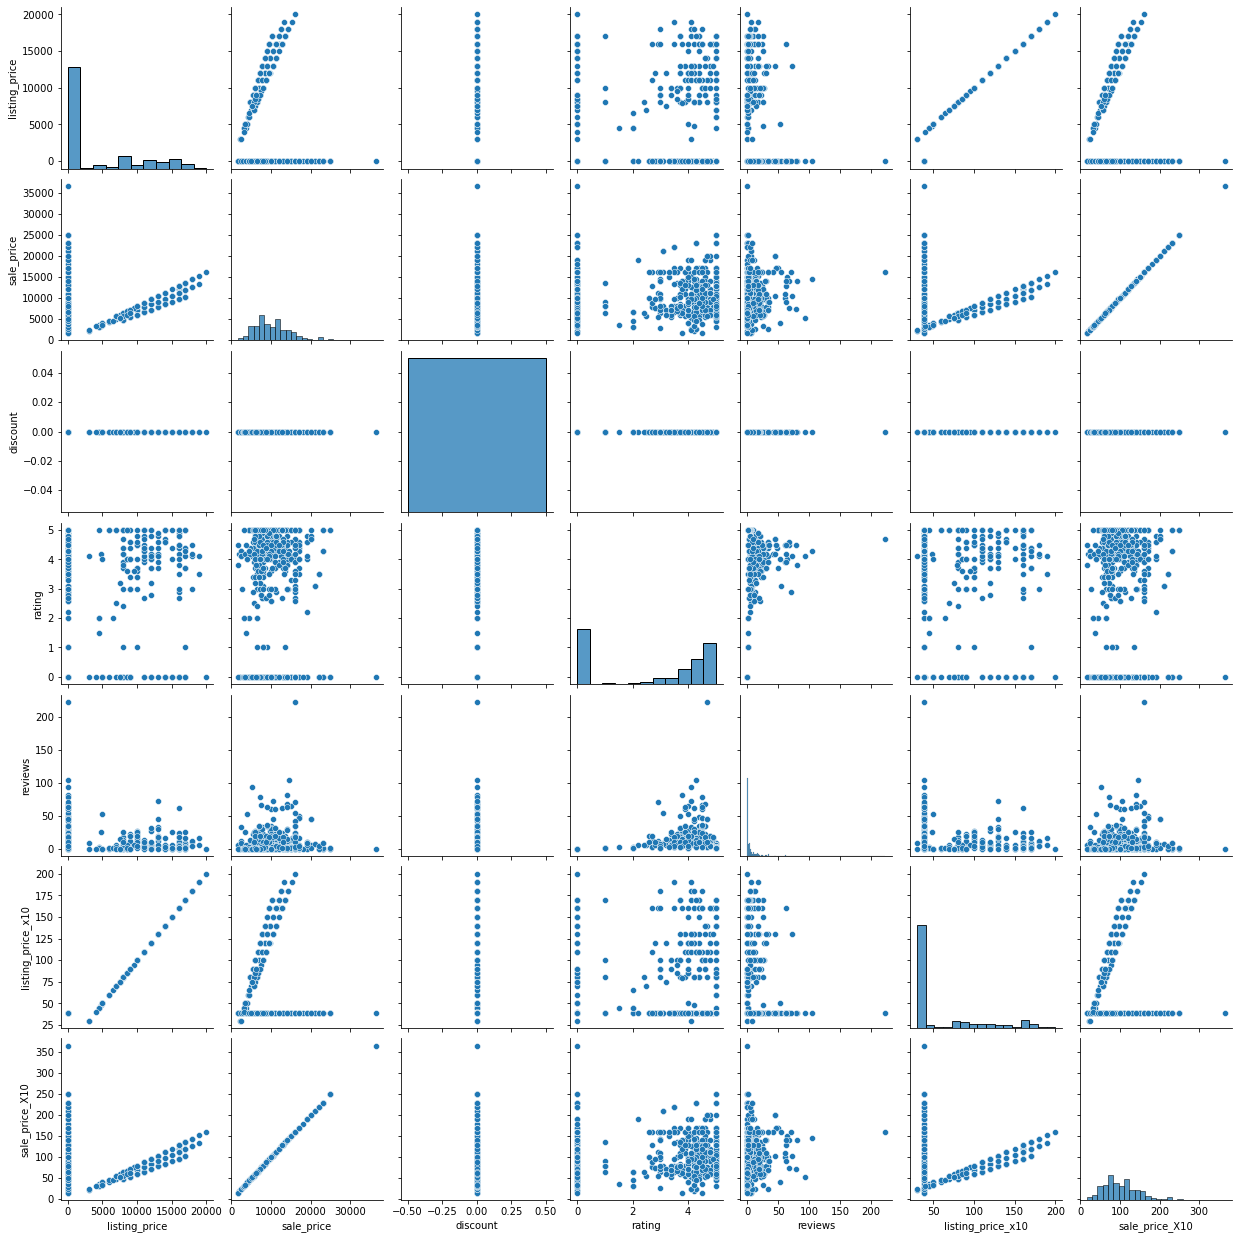

In [31]:
import seaborn as sns

# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Create scatter plots using Seaborn
sns.pairplot(numeric_cols)

In [33]:
# filtering datasets removing 0's 
df_1 = df.loc[(df.listing_price != 0)]
df_2 = df.loc[(df.listing_price == 0)]

In [35]:
# checking datasets
df_1.describe()

,listing_price,sale_price,discount,rating,reviews,listing_price_x10,sale_price_X10
count,217.000000,217.000000,217.0,217.000000,217.000000,217.000000,217.000000
mean,11484.400922,8237.875576,0.0,2.948387,6.539171,114.844009,82.378756
std,3914.790107,2986.535009,0.0,2.006335,10.400747,39.147901,29.865350
min,2995.000000,2097.000000,0.0,0.000000,0.000000,29.950000,20.970000
25%,7995.000000,5997.000000,0.0,0.000000,0.000000,79.950000,59.970000
50%,10995.000000,7797.000000,0.0,4.000000,2.000000,109.950000,77.970000
75%,15995.000000,10497.000000,0.0,4.500000,8.000000,159.950000,104.970000
max,19995.000000,15997.000000,0.0,5.000000,72.000000,199.950000,159.970000


In [36]:
# checking datasets
df_2.describe()

,listing_price,sale_price,discount,rating,reviews,listing_price_x10,sale_price_X10
count,426.0,426.000000,426.0,426.000000,426.000000,4.260000e+02,426.000000
mean,0.0,11220.129108,0.0,2.626056,7.509390,3.876000e+01,112.201291
std,0.0,4819.610435,0.0,2.195997,18.162694,1.778445e-13,48.196104
min,0.0,1595.000000,0.0,0.000000,0.000000,3.876000e+01,15.950000
25%,0.0,7995.000000,0.0,0.000000,0.000000,3.876000e+01,79.950000
50%,0.0,9995.000000,0.0,3.700000,1.000000,3.876000e+01,99.950000
75%,0.0,13995.000000,0.0,4.700000,6.000000,3.876000e+01,139.950000
max,0.0,36500.000000,0.0,5.000000,223.000000,3.876000e+01,365.000000


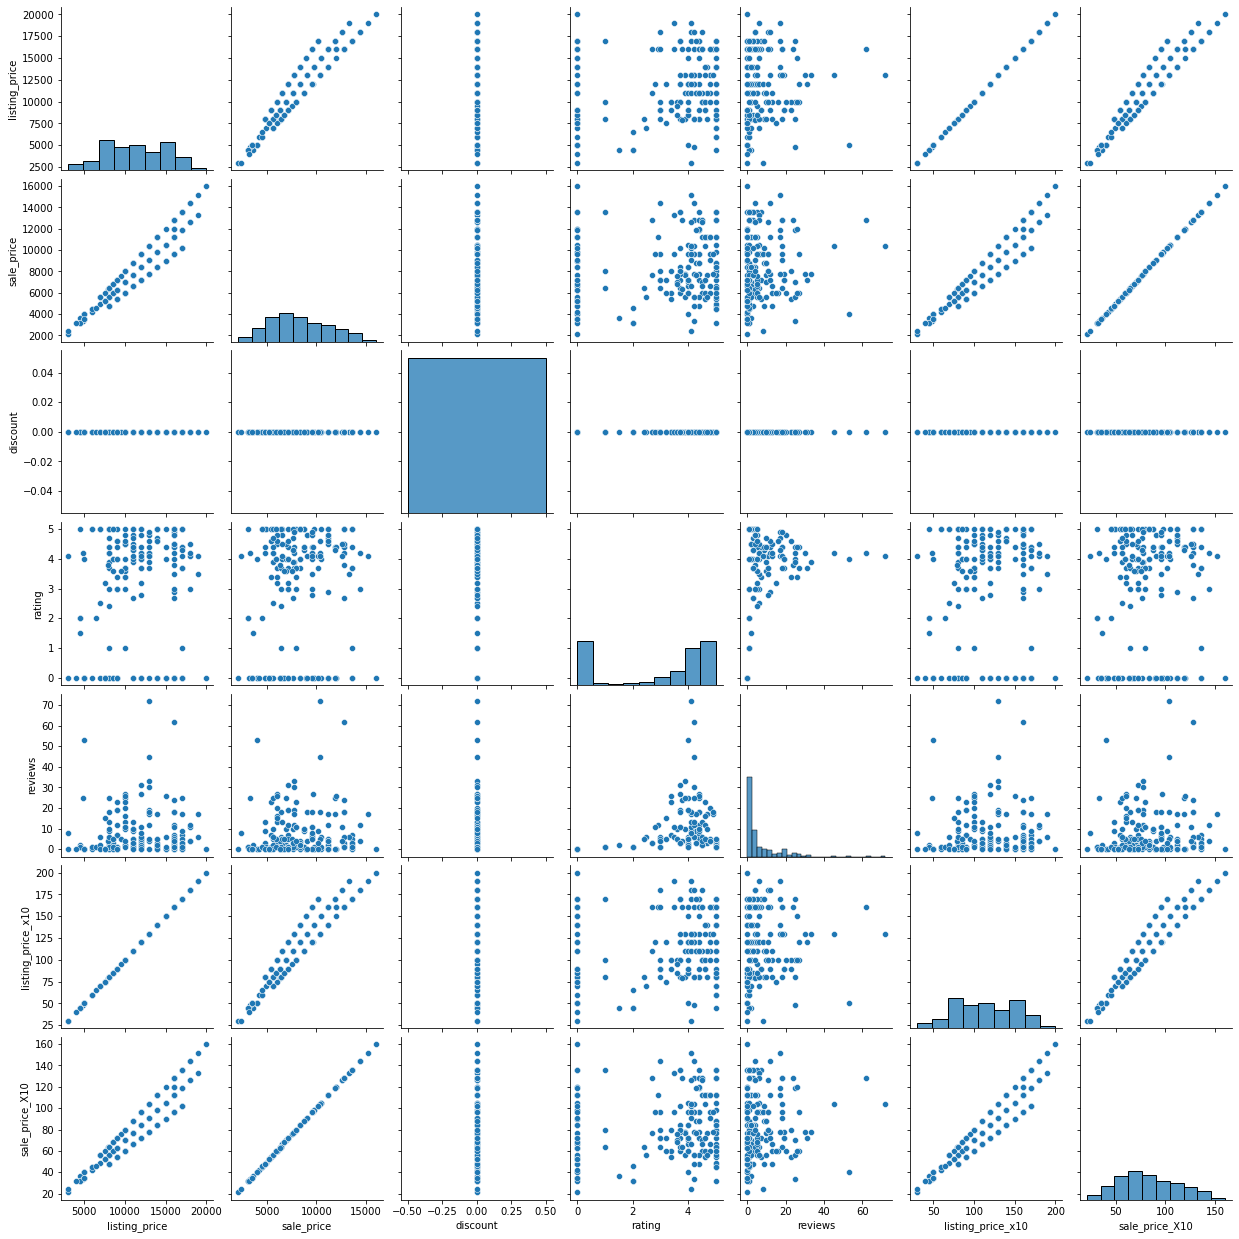

In [37]:
numeric_cols = df_1.select_dtypes(include=['float64', 'int64'])

# Create scatter plots using Seaborn
sns.pairplot(numeric_cols)

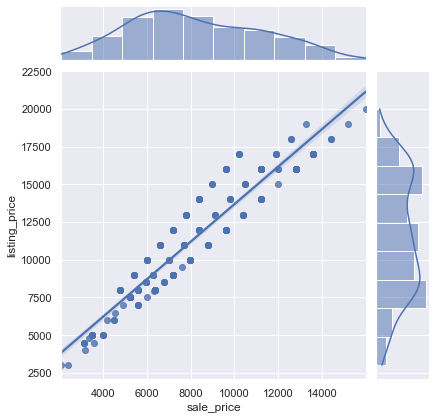

In [47]:
sns.set_theme(style="darkgrid")

sns.jointplot(data=df_1, x='sale_price', y='listing_price', kind='reg')


In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_cols)


In [67]:
df_scaled = pd.DataFrame(df_scaled, columns = ['listing_price','sale_price','discount',
                        'rating','reviews','listing_price_x10','sale_price_X10'])
print(df_scaled)

     listing_price  sale_price  discount    rating   reviews  \
0        -0.893399   -0.886305       0.0  0.625273 -0.051959   
1         1.154858    1.261601       0.0 -1.472937 -0.630175   
2         1.154858    0.993113       0.0 -1.472937 -0.630175   
3         0.642794    0.053404       0.0  1.024932 -0.437436   
4         0.386762   -0.147962       0.0  0.475401  2.550010   
..             ...         ...       ...       ...       ...   
212      -0.125302    0.187648       0.0  0.725188  0.333518   
213       1.154858    1.530089       0.0  1.024932 -0.533806   
214      -1.661495   -1.591087       0.0 -1.472937 -0.630175   
215      -0.765383   -0.768842       0.0  1.024932 -0.533806   
216      -0.637367   -0.651378       0.0 -1.472937 -0.630175   

     listing_price_x10  sale_price_X10  
0            -0.893399       -0.886305  
1             1.154858        1.261601  
2             1.154858        0.993113  
3             0.642794        0.053404  
4             0.386762    

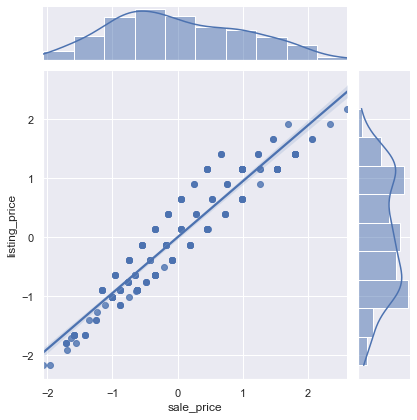

In [68]:
sns.jointplot(data=df_scaled, x='sale_price', y='listing_price', kind='reg')

In [69]:
from sklearn.linear_model import LinearRegression
# Train the linear regression model
regression_model = LinearRegression()
regression_model.fit(df_scaled['sale_price'], df_scaled['listing_price'])

# Make predictions on the test set
predictions = regression_model.predict(df_2['sale_price'])

# Add predictions as a column to the test set
df_2['Prediction'] = predictions

print(df_2)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.88630525  1.26160117  0.99311287  0.05340381 -0.14796242 -0.7520611
 -0.18152346  1.79857777 -0.41645072  0.45613626  0.99311287 -1.15479355
  0.99311287  0.18764796 -0.55069487  1.53008947 -0.55069487  0.05340381
 -0.76884162  0.45613626 -0.41645072  0.7581856   0.18764796  0.05340381
 -1.42328185 -0.18152346 -0.34932865  0.99311287  2.33555438  0.46956068
  1.26160117  1.79857777 -0.34932865  1.53008947 -0.34932865 -1.00376888
 -1.25547666 -1.15479355  1.53008947 -0.08084034  0.99311287 -1.00376888
  0.25477003 -0.61781695  2.06706607 -0.14796242  1.79857777  0.65750249
 -0.7520611   0.99311287 -0.14796242 -0.88630525  0.99311287  0.05340381
 -0.95342732 -0.61781695 -0.34932865 -0.08084034 -0.61781695  0.45613626
 -1.59108704 -0.41645072 -0.61781695  2.60404268 -0.55069487 -0.65137798
  0.99311287  0.18764796 -0.41645072 -1.12123251 -1.59108704  0.25477003
 -0.65137798  1.53008947 -0.88630525 -1.59108704 -2.06094157  1.22804013
 -0.61781695 -1.15479355  0.28833107  1.79857777  0.28833107 -1.00376888
  0.72462456  1.22804013  0.99311287 -0.18152346 -0.34932865 -1.00376888
  0.05340381  0.45613626 -0.61781695 -0.76884162  0.52325834 -0.76884162
  1.46296739 -0.95342732  0.99311287  2.06706607 -0.55069487 -1.70855067
  0.05340381 -0.18152346 -0.18152346  1.79857777  0.18764796 -0.88630525
 -0.08084034 -1.59108704  1.53008947  1.69789466  1.53008947  1.26160117
 -0.7520611   0.99311287 -0.08084034  0.72462456  0.45613626  0.99311287
  0.05340381 -1.00376888  0.99311287 -1.557526   -1.42328185 -0.64466578
 -0.18152346  1.53008947 -0.76884162 -0.14796242 -1.35615978  0.52325834
 -1.96025846  0.72462456 -1.25547666  1.22804013 -0.34932865 -0.34932865
  0.52325834 -0.14796242  1.79857777 -0.55069487 -1.23869615 -1.63807249
  0.99311287  0.99311287  1.46296739  0.45613626 -0.7520611  -1.00376888
  0.05340381 -0.4835728   0.99311287 -1.15479355 -0.55069487  0.7581856
  1.79857777  0.99311287 -1.00376888 -0.08084034 -1.00376888 -0.95342732
 -0.95342732 -1.15479355 -0.88630525 -0.34932865 -0.61781695 -1.59108704
  0.99311287  0.99311287  0.05340381  0.99311287 -0.34932865  0.05340381
 -1.70855067 -0.7520611  -1.70855067  1.53008947 -0.4835728   0.7581856
  0.45613626  0.45613626 -0.34932865 -0.34932865  0.72462456 -1.69177016
  0.65750249 -0.88630525  0.45613626 -0.7520611  -1.42328185 -0.21508449
  0.45613626  0.45613626  0.65750249 -0.65137798 -0.61781695  0.28833107
 -0.34932865 -0.18152346  0.45613626  0.99311287 -0.08084034 -0.88630525
 -0.88630525  1.79857777  1.79857777 -1.00376888 -0.4835728  -0.34932865
  1.53008947 -1.00376888  0.18764796  1.53008947 -1.59108704 -0.76884162
 -0.65137798].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.